# Motor Vehicle Collisions Analysis

## Introduction

Traffic collisions are a significant concern in urban environments, impacting public safety, traffic flow, and overall quality of life. This analysis aims to explore the factors that contribute to the frequency and severity of traffic collisions within a given dataset. By examining variables such as vehicle types, road segments, intersections, and geographic distribution across different boroughs, the analysis seeks to identify patterns and trends that can inform effective safety interventions. Understanding these factors is crucial for developing targeted strategies to reduce collisions and enhance road safety for all users.

In [1]:
import pandas as pd
import numpy as np

In [2]:
collision_df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", low_memory=False)

In [3]:
collision_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and Exploratory Data Analysis

In [4]:
collision_df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.871187e+06,1.871187e+06,2.109784e+06,2.109771e+06,2.109802e+06,2.109802e+06,2.109802e+06,2.109802e+06,2.109802e+06,2.109802e+06,2.109802e+06
mean,4.062307e+01,-7.374371e+01,3.144876e-01,1.518174e-03,5.709256e-02,7.522033e-04,2.735849e-02,1.180206e-04,2.261122e-01,6.242292e-04,3.185200e+06
std,2.026969e+00,3.802631e+00,7.041010e-01,4.112475e-02,2.451278e-01,2.799765e-02,1.651873e-01,1.090663e-02,6.653427e-01,2.729795e-02,1.506005e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066768e+01,-7.397480e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.163570e+06
50%,4.072065e+01,-7.392722e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.691156e+06
75%,4.076963e+01,-7.386674e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.218841e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.746578e+06


In [5]:
collision_df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.871187e+06,1.871187e+06,2.109784e+06,2.109771e+06,2.109802e+06,2.109802e+06,2.109802e+06,2.109802e+06,2.109802e+06,2.109802e+06,2.109802e+06
mean,4.062307e+01,-7.374371e+01,3.144876e-01,1.518174e-03,5.709256e-02,7.522033e-04,2.735849e-02,1.180206e-04,2.261122e-01,6.242292e-04,3.185200e+06
std,2.026969e+00,3.802631e+00,7.041010e-01,4.112475e-02,2.451278e-01,2.799765e-02,1.651873e-01,1.090663e-02,6.653427e-01,2.729795e-02,1.506005e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066768e+01,-7.397480e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.163570e+06
50%,4.072065e+01,-7.392722e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.691156e+06
75%,4.076963e+01,-7.386674e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.218841e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.746578e+06


In [6]:
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109802 entries, 0 to 2109801
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [7]:
collision_df.shape

(2109802, 29)

In [8]:
collision_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [9]:
collision_df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           656286
ZIP CODE                          656545
LATITUDE                          238615
LONGITUDE                         238615
LOCATION                          238615
ON STREET NAME                    450495
CROSS STREET NAME                 802017
OFF STREET NAME                  1751680
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7020
CONTRIBUTING FACTOR VEHICLE 2     329427
CONTRIBUTING FACTOR VEHICLE 3    1958388
CONTRIBUTING FACTOR VEHICLE 4    2075501
CONTRIBUTING FACTOR VEHICLE 5    2100491
COLLISION_ID                           0
VEHICLE TYPE COD

In [10]:
collision_df['NUMBER OF PERSONS INJURED'].fillna(collision_df['NUMBER OF PERSONS INJURED'].median(), inplace=True)
collision_df['NUMBER OF PERSONS KILLED'].fillna(collision_df['NUMBER OF PERSONS KILLED'].median(), inplace=True)

In [11]:
collision_df.drop(['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CONTRIBUTING FACTOR VEHICLE 3',
                   'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'OFF STREET NAME', 'LONGITUDE', 'LATITUDE',
                   'ZIP CODE'], axis=1, inplace=True)

In [12]:
collision_df['NUMBER OF PERSONS INJURED'] = collision_df['NUMBER OF PERSONS INJURED'].astype(int)
collision_df['NUMBER OF PERSONS KILLED'] = collision_df['NUMBER OF PERSONS KILLED'].astype(int)

In [13]:
collision_df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          656286
LOCATION                         238615
ON STREET NAME                   450495
CROSS STREET NAME                802017
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      7020
CONTRIBUTING FACTOR VEHICLE 2    329427
COLLISION_ID                          0
VEHICLE TYPE CODE 1               14207
VEHICLE TYPE CODE 2              407781
dtype: int64

In [14]:
null_counts = collision_df.isnull().sum()
null_percentages = (null_counts / len(collision_df)) * 100

print(null_percentages)

CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          31.106521
LOCATION                         11.309829
ON STREET NAME                   21.352478
CROSS STREET NAME                38.013852
NUMBER OF PERSONS INJURED         0.000000
NUMBER OF PERSONS KILLED          0.000000
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.332733
CONTRIBUTING FACTOR VEHICLE 2    15.614119
COLLISION_ID                      0.000000
VEHICLE TYPE CODE 1               0.673381
VEHICLE TYPE CODE 2              19.327927
dtype: float64


In [15]:
collision_df.shape

(2109802, 19)

In [16]:
collision_df = collision_df.drop_duplicates()

In [17]:
collision_df.shape

(2109802, 19)

In [18]:
# identify rows with multiple null values
multiple_null_rows = collision_df[(collision_df.isnull().sum(axis=1) > 2)]
multiple_null_rows.head()

,CRASH DATE,CRASH TIME,BOROUGH,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
1,03/26/2022,11:45,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,"(40.667202, -73.8665)",NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,4407458,Dump,Sedan


In [19]:
collision_df = collision_df.drop(multiple_null_rows.index)

In [20]:
collision_df.shape

(1728192, 19)

In [21]:
collision_df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          401896
LOCATION                         123339
ON STREET NAME                   207180
CROSS STREET NAME                457031
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      1081
CONTRIBUTING FACTOR VEHICLE 2    154184
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1187
VEHICLE TYPE CODE 2              179320
dtype: int64

In [22]:
null_counts = collision_df.isnull().sum()
null_percentages = (null_counts / len(collision_df)) * 100

print(null_percentages)

CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          23.255286
LOCATION                          7.136881
ON STREET NAME                   11.988251
CROSS STREET NAME                26.445615
NUMBER OF PERSONS INJURED         0.000000
NUMBER OF PERSONS KILLED          0.000000
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.062551
CONTRIBUTING FACTOR VEHICLE 2     8.921694
COLLISION_ID                      0.000000
VEHICLE TYPE CODE 1               0.068684
VEHICLE TYPE CODE 2              10.376162
dtype: float64


In [23]:
# List of columns to fill with their mode
columns_to_fill = ['BOROUGH', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 
                   'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
                   'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

# Fill missing values in each column with the top 3 mode values
for column in columns_to_fill:
    # Get the top 3 mode values
    mode_values = collision_df[column].mode().head(3)
    
    # Only proceed if there are at least one mode value
    if not mode_values.empty:
        # Calculate the number of null values
        num_nulls = collision_df[column].isnull().sum()
        
        # Repeat the mode values to cover all nulls
        repeated_modes = np.tile(mode_values, num_nulls // len(mode_values) + 1)
        
        # Shuffle the repeated mode values
        np.random.shuffle(repeated_modes)
        
        # Select the exact number of values needed
        random_fill_values = repeated_modes[:num_nulls]
        
        # Fill the NaN values with the shuffled mode values
        collision_df.loc[collision_df[column].isnull(), column] = random_fill_values

In [24]:
collision_df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
LOCATION                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
dtype: int64

In [25]:
collision_df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']] = collision_df[['VEHICLE TYPE CODE 1', 
                                                                             'VEHICLE TYPE CODE 2']].apply(lambda x: x.str.capitalize())

In [26]:
collision_df['VEHICLE TYPE CODE 1'] = collision_df['VEHICLE TYPE CODE 1'].replace('Station wagon/sport utility vehicle', 'Station Wagon')
collision_df['VEHICLE TYPE CODE 1'] = collision_df['VEHICLE TYPE CODE 1'].replace('Sport utility / station wagon', 'Station Wagon')

In [27]:
collision_df.to_csv('output.csv', index=False)

# Collision Frequency and Severity

### What is the total number of collisions recorded in the dataset?

In [28]:
print("The total number of collisions recorded in the dataset are ", len(collision_df))

The total number of collisions recorded in the dataset are  1728192


### What percentage of collisions resulted in injuries or fatalities?

In [29]:
Total_number_collision = len(collision_df)
Total_number_injured = collision_df['NUMBER OF PERSONS INJURED'].sum()
print("The total number of collisions that resulted in injuries are ", Total_number_injured)

Percentage_injured = round((Total_number_injured/Total_number_collision) * 100, 2)
print("The percentage of collisions that resulted in injuries are ", Percentage_injured,"%")

Total_number_killed = collision_df['NUMBER OF PERSONS KILLED'].sum()
print("The total number of collisions that resulted in death are ", Total_number_killed)

Percentage_killed = round((Total_number_killed/Total_number_collision) * 100, 2)
print("The percentage of collisions that resulted in death are ", Percentage_killed,"%")

The total number of collisions that resulted in injuries are  543414
The percentage of collisions that resulted in injuries are  31.44 %
The total number of collisions that resulted in death are  2207
The percentage of collisions that resulted in death are  0.13 %


This analysis suggests that while a significant number of collisions result in injuries, the vast majority of collisions do not result in fatalities.
The analysis may indicate that there are opportunities to improve road safety and reduce the number of injuries and fatalities resulting from collisions.

# Time-Based Analysis

### Which days of the week or months of the year have the highest collision rates?

In [30]:
collision_df['CRASH DATE'] = pd.to_datetime(collision_df['CRASH DATE'], errors='coerce')
collision_df['DayOfWeek'] = collision_df['CRASH DATE'].dt.day_name()
collision_df['Month'] = collision_df['CRASH DATE'].dt.month_name()

In [31]:
collisions_by_day = collision_df.groupby('DayOfWeek').size().sort_values(ascending=False)
collisions_by_month = collision_df.groupby('Month').size().sort_values(ascending=False)

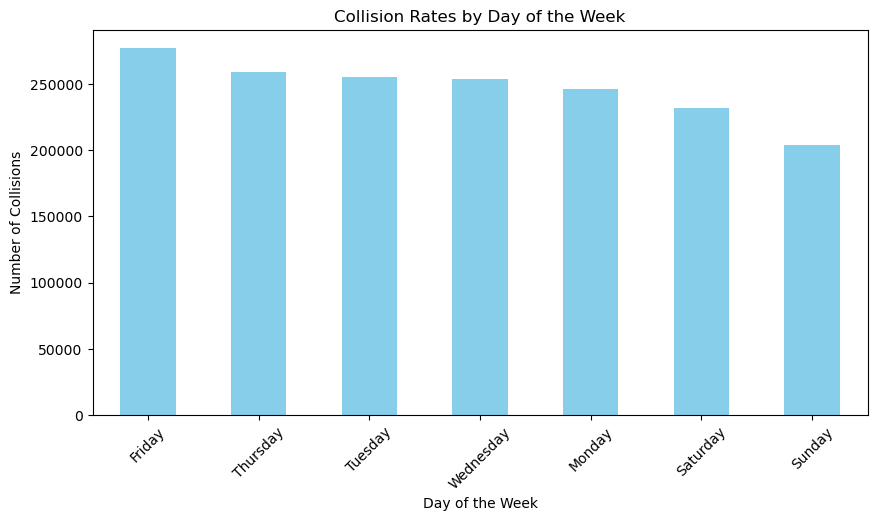

In [32]:
import matplotlib.pyplot as plt

# Plot Days of the Week
plt.figure(figsize=(10, 5))
collisions_by_day.plot(kind='bar', color='skyblue')
plt.title('Collision Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()

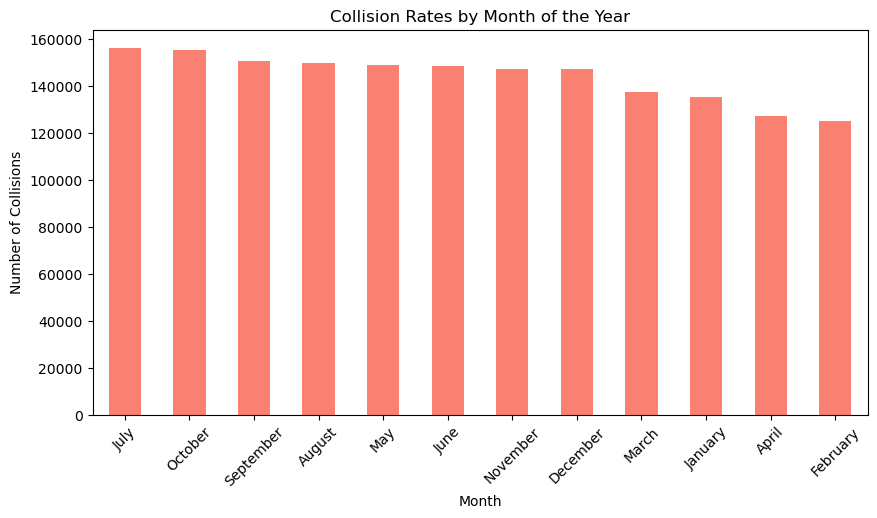

In [33]:
# Plot Months of the Year
plt.figure(figsize=(10, 5))
collisions_by_month.plot(kind='bar', color='salmon')
plt.title('Collision Rates by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()

Most collisions occur on Friday, followed by Thursday, Tuesday, Wednesday, Monday, Saturday, and then Sunday. The highest collision rates occur in July, October, and September. The lowest collision rates occur in February. The collision rates are relatively consistent throughout the year, with no major spikes or dips.

### Is there a trend in the number of collisions over the years?

In [34]:
collision_df['Year'] = collision_df['CRASH DATE'].dt.year

In [35]:
collisions_by_year = collision_df.groupby('Year').size()

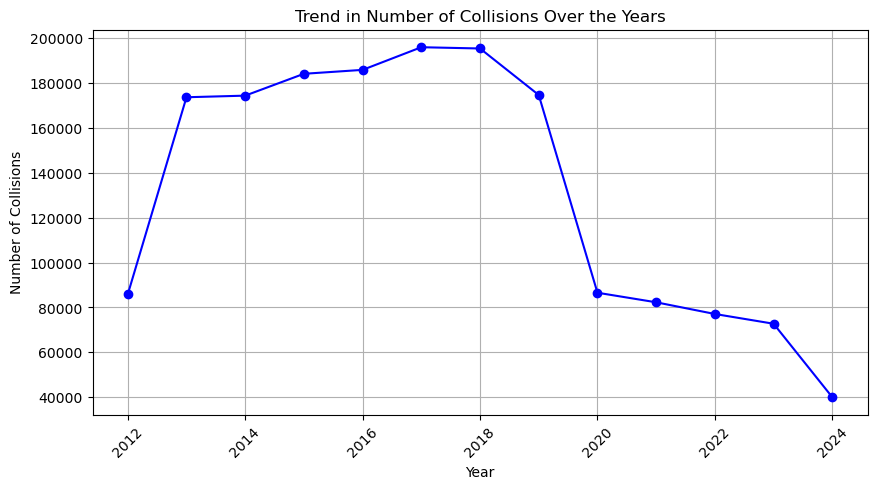

In [36]:
# Plot the trend

plt.figure(figsize=(10, 5))
plt.plot(collisions_by_year, marker='o', linestyle='-', color='blue')
plt.title('Trend in Number of Collisions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The number of collisions peaked in 2017 and 2018, and has been decreasing since then. The number of collisions in 2024 is significantly lower than in previous years.

# Location-Based Analysis

### Which locations (streets, boroughs) have the highest frequency of collisions?

In [37]:
collisions_by_borough = collision_df.groupby('BOROUGH').size().sort_values(ascending=False)

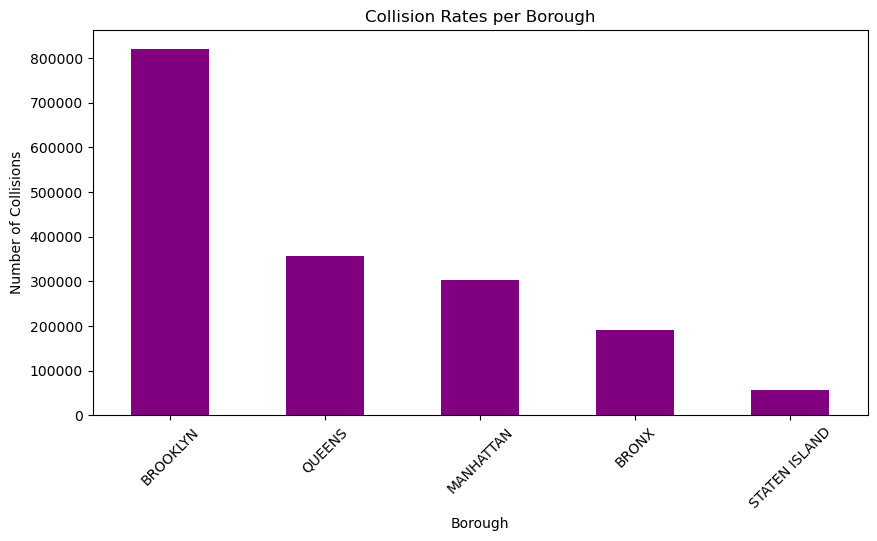

In [38]:
plt.figure(figsize=(10, 5))
collisions_by_borough.plot(kind='bar', color='purple')
plt.title('Collision Rates per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()

In [39]:
collisions_per_street = collision_df.groupby('ON STREET NAME').size().sort_values(ascending=False)
top_10_collisions_per_street = collisions_per_street[:10]

In [40]:
print(top_10_collisions_per_street)

ON STREET NAME
BROADWAY                            223529
ATLANTIC AVENUE                      14749
3 AVENUE                             11919
NORTHERN BOULEVARD                   11530
BELT PARKWAY                         10510
FLATBUSH AVENUE                       9333
LINDEN BOULEVARD                      9201
QUEENS BOULEVARD                      9028
2 AVENUE                              8723
LONG ISLAND EXPRESSWAY                8432
dtype: int64


In [41]:
street_data = {'Street Name': top_10_collisions_per_street.index, 
         'Collisions': [collision_count for collision_count in top_10_collisions_per_street]}
street_df = pd.DataFrame(street_data) 

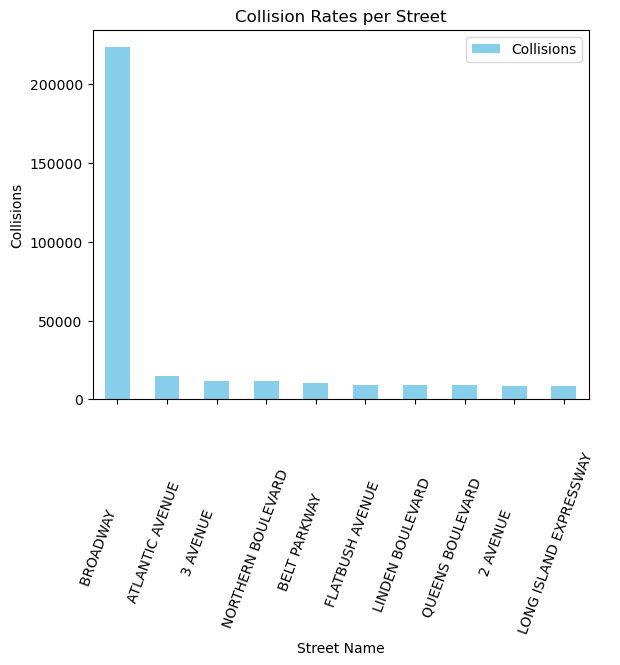

In [42]:
street_df.plot(kind='bar', x='Street Name', y='Collisions', color='skyblue')
plt.title('Collision Rates per Street')
plt.xlabel('Street Name')
plt.ylabel('Collisions')
plt.xticks(rotation=70)
plt.show() 

### Are there any specific locations that are hotspots for severe accidents (injuries/fatalities)?

In [43]:
injury_hotspots = collision_df.groupby('ON STREET NAME')['NUMBER OF PERSONS INJURED'].sum().sort_values(ascending=False)
top_10_injury_hotspots = injury_hotspots[:10]

In [44]:
top_10_injury_hotspots

ON STREET NAME
BROADWAY                            48422
ATLANTIC AVENUE                      4851
BELT PARKWAY                         4671
LINDEN BOULEVARD                     4271
3 AVENUE                             3019
BELT PARKWAY                         2932
LONG ISLAND EXPRESSWAY               2917
GRAND CENTRAL PKWY                   2896
NORTHERN BOULEVARD                   2855
FLATBUSH AVENUE                      2728
Name: NUMBER OF PERSONS INJURED, dtype: int32

In [45]:
injury_data = {
    'Street Name': top_10_injury_hotspots.index, 
    'Injuries': top_10_injury_hotspots.values}

injury_df = pd.DataFrame(injury_data)

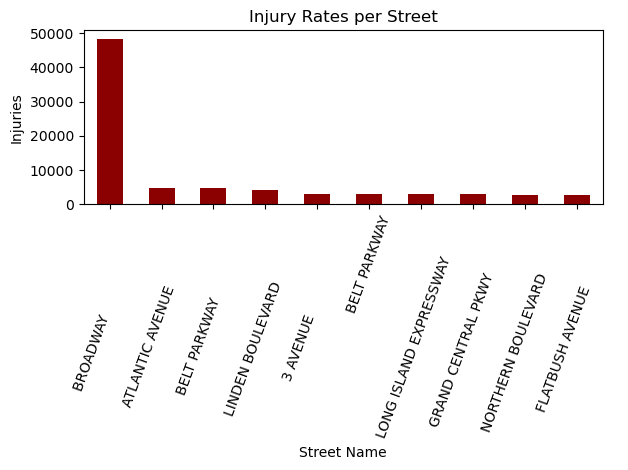

In [46]:
injury_df.plot(kind='bar', x='Street Name', y='Injuries', color='darkred', legend=False)

plt.title('Injury Rates per Street')
plt.xlabel('Street Name')
plt.ylabel('Injuries')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

# Vehicle and Driver Characteristics

### What types of vehicles (e.g., cars, trucks, motorcycles) are most frequently involved in collisions?

In [47]:
frequent_vehicles = collision_df.groupby('VEHICLE TYPE CODE 1').size().sort_values(ascending=False)
top_10_frequent_vehicles = frequent_vehicles[:10]

In [48]:
top_10_frequent_vehicles

VEHICLE TYPE CODE 1
Station Wagon        528332
Sedan                476450
Passenger vehicle    349927
Taxi                  75275
Pick-up truck         39277
Bus                   33022
Van                   30552
4 dr sedan            30248
Box truck             21422
Other                 19940
dtype: int64

In [49]:
vehicle_data = {
    'Vehicle Name': top_10_frequent_vehicles.index, 
    'Collisions': top_10_frequent_vehicles.values
}
vehicle_df = pd.DataFrame(vehicle_data)

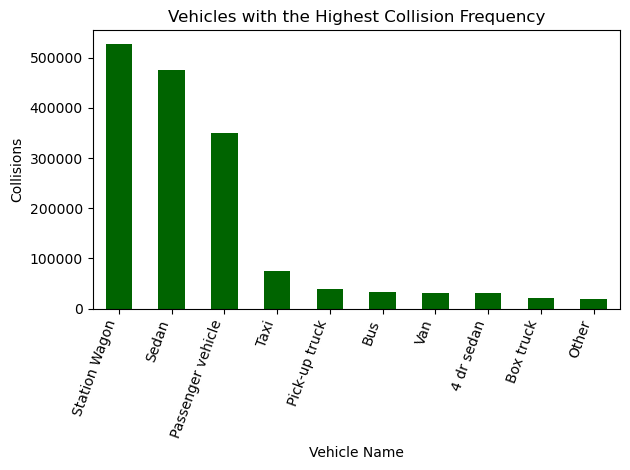

In [50]:
vehicle_df.plot(kind='bar', x='Vehicle Name', y='Collisions', color='darkgreen', legend=False)
plt.title('Vehicles with the Highest Collision Frequency')
plt.xlabel('Vehicle Name')
plt.ylabel('Collisions')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

Staion Wagons have the highest collision frequency, followed by Sedans and Passenger Vehicles. The frequency of collisions drops off sharply for other types of vehicles, with Taxi, 4 door sedans, TAXI, Pick-up trucks, Vans and Box Trucks having much lower collision frequency.

# Contributing Factors

### What are the most common contributing factors to collisions (e.g., speeding, distracted driving, alcohol use)?

In [51]:
contributing_factors = collision_df.groupby('CONTRIBUTING FACTOR VEHICLE 1').size().sort_values(ascending=False)
top_10_contributing_factors = contributing_factors[:10]

In [52]:
top_10_contributing_factors

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       562524
Driver Inattention/Distraction    358295
Failure to Yield Right-of-Way     111825
Following Too Closely              98637
Backing Unsafely                   65711
Other Vehicular                    54936
Passing or Lane Usage Improper     51258
Turning Improperly                 43766
Passing Too Closely                42960
Unsafe Lane Changing               36207
dtype: int64

In [53]:
contributing_factors_data = {
    'Factors': top_10_contributing_factors.index, 
    'Collisions': top_10_contributing_factors.values
}
contributing_factors_df = pd.DataFrame(contributing_factors_data)

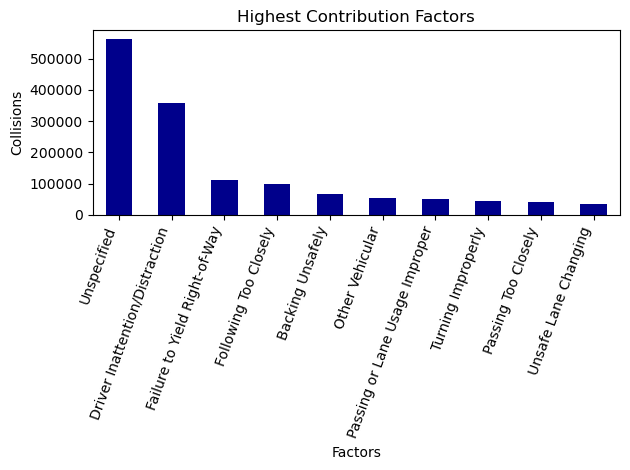

In [54]:
contributing_factors_df.plot(kind='bar', x='Factors', y='Collisions', color='darkblue', legend=False)
plt.title('Highest Contribution Factors')
plt.xlabel('Factors')
plt.ylabel('Collisions')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

In [55]:
contributing_factors_2 = collision_df.groupby('CONTRIBUTING FACTOR VEHICLE 2').size().sort_values(ascending=False)
top_10_contributing_factors_2 = contributing_factors_2[:10]

In [56]:
top_10_contributing_factors_2

CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1474607
Driver Inattention/Distraction      88248
Other Vehicular                     29411
Following Too Closely               17147
Failure to Yield Right-of-Way       16319
Passing or Lane Usage Improper      12123
Passing Too Closely                  8241
Turning Improperly                   7525
Backing Unsafely                     7164
Fatigued/Drowsy                      7023
dtype: int64

In [57]:
contributing_factors_data2 = {
    'Factors': top_10_contributing_factors_2.index, 
    'Collisions': top_10_contributing_factors_2.values
}
contributing_factors_df2 = pd.DataFrame(contributing_factors_data)

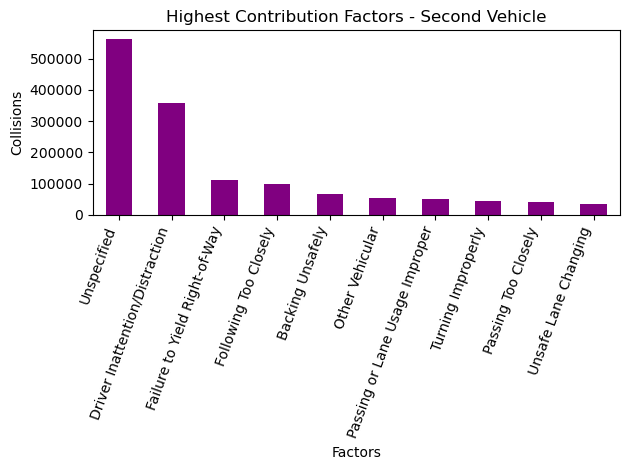

In [58]:
contributing_factors_df.plot(kind='bar', x='Factors', y='Collisions', color='purple', legend=False)
plt.title('Highest Contribution Factors - Second Vehicle')
plt.xlabel('Factors')
plt.ylabel('Collisions')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

Although majority of the contributing factors are Unspecified, Driver inattention/distraction is a major and the second highest contributing factor to collisions.

### How does the presence of alcohol or drugs influence the severity of collisions?

In [59]:
collision_df['Alcohol_Drug_Involved'] = collision_df[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']].apply(
    lambda x: 1 if 'Alcohol Involvement' in x.values or 'Drugs (illegal)' in x.values else 0, axis=1)

severity_columns = [
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]

correlation_results = collision_df[severity_columns + ['Alcohol_Drug_Involved']].corr()['Alcohol_Drug_Involved'].drop('Alcohol_Drug_Involved')

print("Correlation between Alcohol/Drug Involvement and Collision Severity:")
print(correlation_results)

Correlation between Alcohol/Drug Involvement and Collision Severity:
NUMBER OF PERSONS INJURED        0.029103
NUMBER OF PERSONS KILLED         0.008067
NUMBER OF PEDESTRIANS INJURED   -0.008132
NUMBER OF PEDESTRIANS KILLED     0.004268
NUMBER OF CYCLIST INJURED       -0.006278
NUMBER OF CYCLIST KILLED         0.003284
NUMBER OF MOTORIST INJURED       0.035105
NUMBER OF MOTORIST KILLED        0.006304
Name: Alcohol_Drug_Involved, dtype: float64


The correlation data shows that the presence of alcohol or drugs in collisions has a very weak relationship with collision severity. The correlations are close to zero, indicating that alcohol or drug involvement does not significantly impact the number of injuries or fatalities in these collisions. While there are slight positive correlations for motorist injuries and fatalities, and slight negative correlations for pedestrian and cyclist injuries, none are strong enough to suggest a meaningful influence. This implies that other factors might play a more significant role in determining collision severity. 

# Pedestrian and Cyclist Involvement


### What percentage of collisions involve pedestrians or cyclists?


In [60]:
pedestrian_injuries = collision_df['NUMBER OF PEDESTRIANS INJURED'].sum()
pedestrian_fatalities = collision_df['NUMBER OF PEDESTRIANS KILLED'].sum()

pedestrian_injuries_percentage = (pedestrian_injuries / Total_number_collision) * 100
pedestrian_fatalities_percentage = (pedestrian_fatalities / Total_number_collision) * 100

print(f"Percentage of collisions involving pedestrians injuries: {pedestrian_injuries_percentage:.2f}%")
print(f"Percentage of collisions involving pedestrians fatalities: {pedestrian_fatalities_percentage:.2f}%")

Percentage of collisions involving pedestrians injuries: 4.29%
Percentage of collisions involving pedestrians fatalities: 0.06%


In [61]:
cyclist_injuries = collision_df['NUMBER OF CYCLIST INJURED'].sum()
cyclist_fatalities = collision_df['NUMBER OF CYCLIST KILLED'].sum()

cyclist_injuries_percentage = (cyclist_injuries / Total_number_collision) * 100
cyclist_fatalities_percentage = (cyclist_fatalities / Total_number_collision) * 100

print(f"Percentage of collisions involving cyclist injuries: {cyclist_injuries_percentage:.2f}%")
print(f"Percentage of collisions involving cyclist fatalities: {cyclist_fatalities_percentage:.2f}%")

Percentage of collisions involving cyclist injuries: 3.10%
Percentage of collisions involving cyclist fatalities: 0.01%


In [62]:
motorist_injuries = collision_df['NUMBER OF MOTORIST INJURED'].sum()
motorist_fatalities = collision_df['NUMBER OF MOTORIST KILLED'].sum()

motorist_injuries_percentage = (motorist_injuries / Total_number_collision) * 100
motorist_fatalities_percentage = (motorist_fatalities / Total_number_collision) * 100

print(f"Percentage of collisions involving motorist injuries: {motorist_injuries_percentage:.2f}%")
print(f"Percentage of collisions involving motorist fatalities: {motorist_fatalities_percentage:.2f}%")

Percentage of collisions involving motorist injuries: 23.63%
Percentage of collisions involving motorist fatalities: 0.05%


### How does the severity of injuries differ between pedestrians, cyclists, and vehicle occupants?

In [63]:
pedestrian_involved_collisions = collision_df[
    (collision_df['NUMBER OF PEDESTRIANS INJURED'] > 0) | 
    (collision_df['NUMBER OF PEDESTRIANS KILLED'] > 0)
].shape[0]

cyclist_involved_collisions = collision_df[
    (collision_df['NUMBER OF CYCLIST INJURED'] > 0) | 
    (collision_df['NUMBER OF CYCLIST KILLED'] > 0)
].shape[0]

motorist_involved_collisions = collision_df[
    (collision_df['NUMBER OF MOTORIST INJURED'] > 0) | 
    (collision_df['NUMBER OF MOTORIST KILLED'] > 0)
].shape[0]

avg_pedestrian_injuries_per_collision = pedestrian_injuries / pedestrian_involved_collisions
avg_pedestrian_fatalities_per_collision = pedestrian_fatalities / pedestrian_involved_collisions

avg_cyclist_injuries_per_collision = cyclist_injuries / cyclist_involved_collisions
avg_cyclist_fatalities_per_collision = cyclist_fatalities / cyclist_involved_collisions

avg_motorist_injuries_per_collision = motorist_injuries / motorist_involved_collisions
avg_motorist_fatalities_per_collision = motorist_fatalities / motorist_involved_collisions

print("Severity of Injuries by Group:")
print(f"Pedestrians: {avg_pedestrian_injuries_per_collision:.2f} injuries per collision, {avg_pedestrian_fatalities_per_collision:.2f} fatalities per collision")
print(f"Cyclists: {avg_cyclist_injuries_per_collision:.2f} injuries per collision, {avg_cyclist_fatalities_per_collision:.2f} fatalities per collision")
print(f"Vehicle Occupants: {avg_motorist_injuries_per_collision:.2f} injuries per collision, {avg_motorist_fatalities_per_collision:.2f} fatalities per collision")


Severity of Injuries by Group:
Pedestrians: 1.03 injuries per collision, 0.01 fatalities per collision
Cyclists: 1.01 injuries per collision, 0.00 fatalities per collision
Vehicle Occupants: 1.54 injuries per collision, 0.00 fatalities per collision


# Impact of Traffic Violations

### Which contributors are most commonly associated with severe or fatal collisions?

In [64]:
severe_collision_df = collision_df[
    (collision_df['NUMBER OF PERSONS INJURED'] >= 1) | 
    (collision_df['NUMBER OF PERSONS KILLED'] >= 1)
]

# Count the frequency of each contributing factor in severe collisions
contributing_factors = [
    'CONTRIBUTING FACTOR VEHICLE 1', 
    'CONTRIBUTING FACTOR VEHICLE 2'
]

# Combine the contributing factors into a single series
severe_contributors = pd.concat([severe_collision_df[factor] for factor in contributing_factors])

# Count the occurrences of each factor
contributor_counts = severe_contributors.value_counts().head(10)

# Display the most common contributing factors
print("Most Common Contributing Factors in Severe or Fatal Collisions:")
print(contributor_counts)

Most Common Contributing Factors in Severe or Fatal Collisions:
Unspecified                                              446716
Driver Inattention/Distraction                           109793
Failure to Yield Right-of-Way                             46958
Following Too Closely                                     31341
Traffic Control Disregarded                               18761
Other Vehicular                                           15542
Unsafe Speed                                              12788
Passing or Lane Usage Improper                            10600
Turning Improperly                                         8272
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      7281
Name: count, dtype: int64


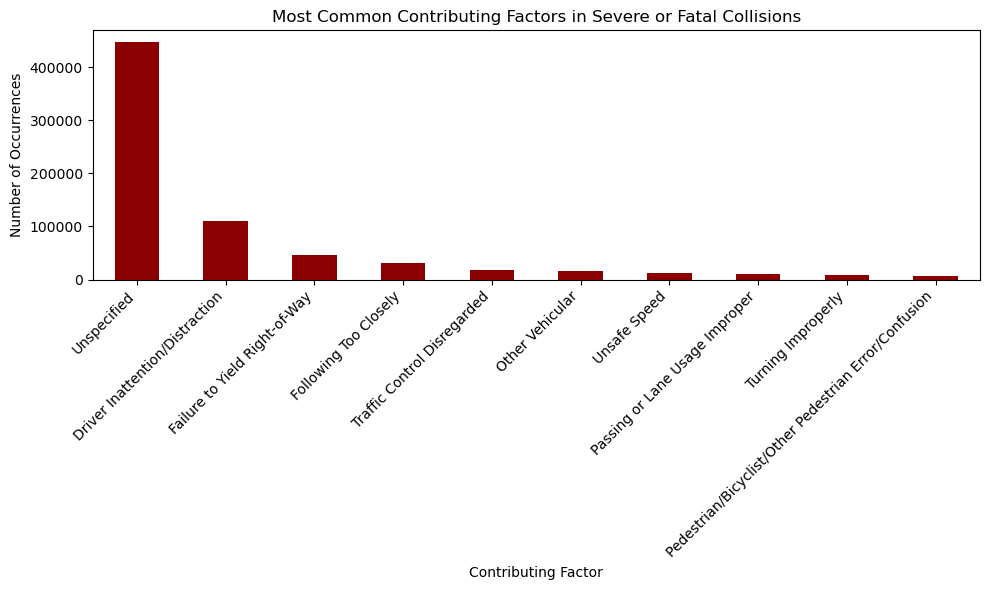

In [65]:
plt.figure(figsize=(10, 6))
contributor_counts.plot(kind='bar', color='darkred')
plt.title('Most Common Contributing Factors in Severe or Fatal Collisions')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Are there any specific types of intersections or road segments that are prone to higher collision rates?

In [66]:
collision_df['Intersection'] = collision_df['ON STREET NAME'] + ' & ' + collision_df['CROSS STREET NAME']

intersection_collision_counts = collision_df['Intersection'].value_counts()

In [67]:
top_intersections = intersection_collision_counts.head(10)

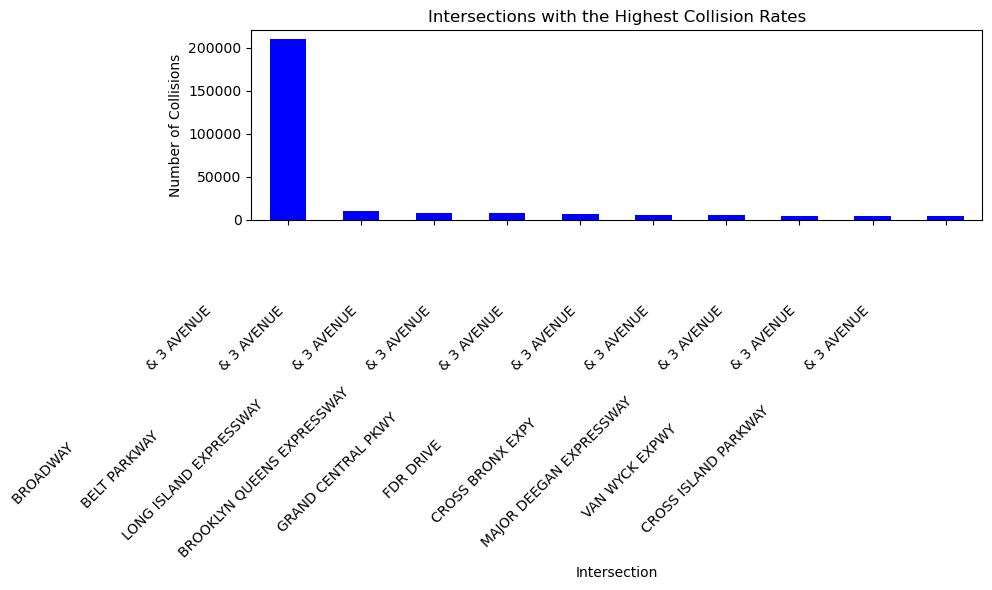

In [68]:
plt.figure(figsize=(10, 6))
top_intersections.plot(kind='bar', color='blue')
plt.title('Intersections with the Highest Collision Rates')
plt.xlabel('Intersection')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Geospatial Analysis

### How does collision frequency and severity vary across different boroughs?

In [69]:
# Group the data by borough and calculate the frequency of collisions
borough_collision_counts = collision_df.groupby('BOROUGH').size()

# Calculate the severity of collisions (total injuries and fatalities) in each borough
borough_severity = collision_df.groupby('BOROUGH').agg({
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum'})

In [70]:
# Calculate the average severity per collision for each borough
borough_severity['Average Injuries per Collision'] = borough_severity['NUMBER OF PERSONS INJURED'] / borough_collision_counts
borough_severity['Average Fatalities per Collision'] = borough_severity['NUMBER OF PERSONS KILLED'] / borough_collision_counts

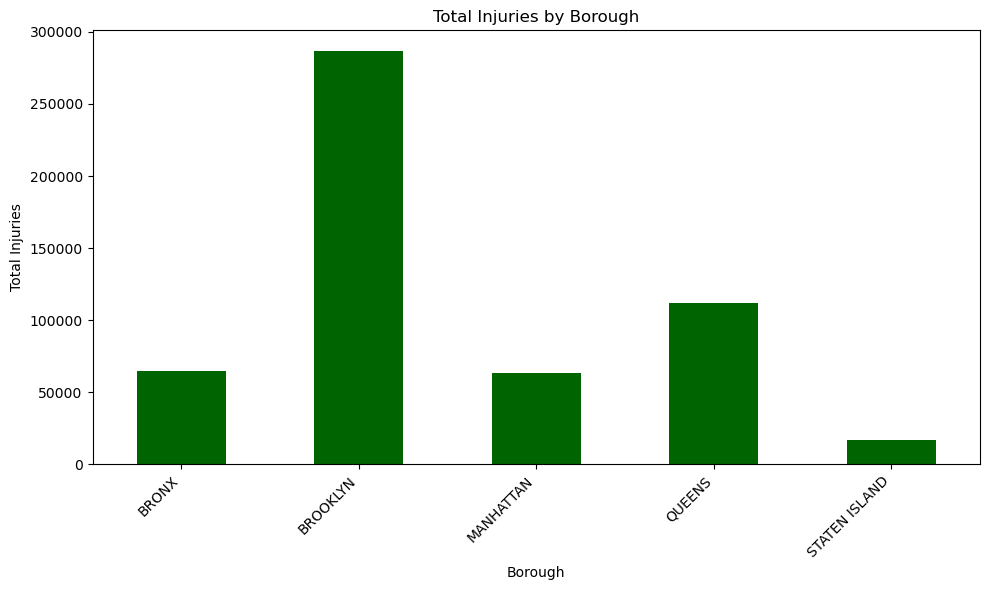

In [71]:
# Plotting Severity of Collisions by Borough (Injuries)
plt.figure(figsize=(10, 6))
borough_severity['NUMBER OF PERSONS INJURED'].plot(kind='bar', color='darkgreen')
plt.title('Total Injuries by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

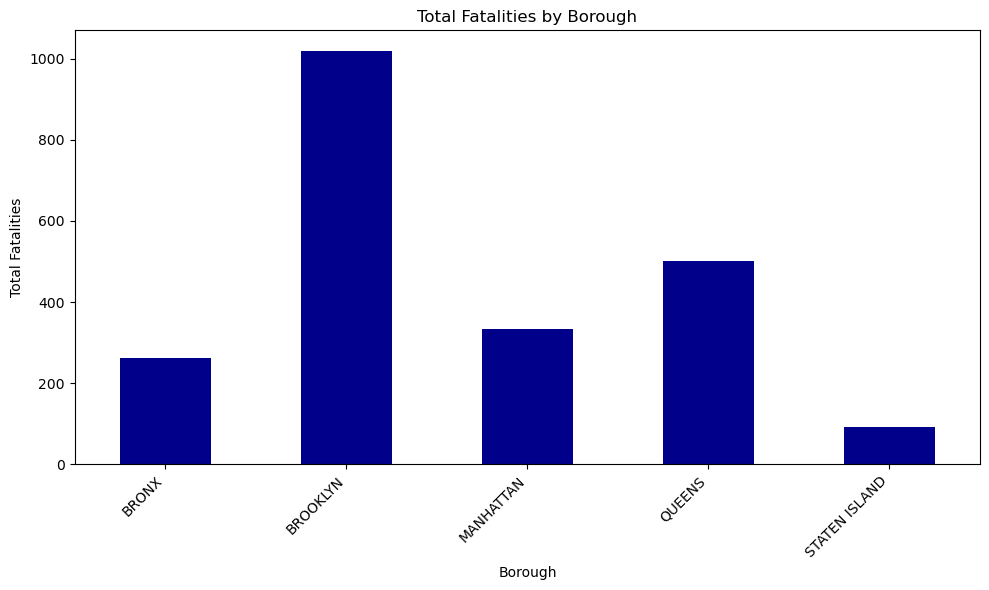

In [72]:
# Plotting Severity of Collisions by Borough (Fatalities)

plt.figure(figsize=(10, 6))
borough_severity['NUMBER OF PERSONS KILLED'].plot(kind='bar', color='darkblue')
plt.title('Total Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion

This project analyzed traffic collisions to understand factors influencing collision frequency and severity. Key findings include:

- Variation Across Boroughs: While all the boroughs show high collisions rates, collision rates and severity are significantly higher in Brooklyn.
- Common Contributing Factors: Driver inattention, failure to yield, and following too closely are the leading causes of severe collisions.
- High-Risk Intersections: Certain intersections and road segments are particularly prone to collisions, suggesting the need for engineering improvements.
-Vehicle Type Influence: Certain vehicle types, like sedans, are more frequently involved in collisions.

##### Recommendations: 
Implement targeted safety measures, launch awareness campaigns, redesign high-risk intersections, and focus on vehicle-specific safety initiatives to reduce collisions and improve road safety.